In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [156]:
df = pd.read_csv('../data/Listado_de_Graduados_Programas_de_Pregrado_y_Posgrado_Universidad_de_Sucre_20240916.csv')

Exploración inicial

In [157]:
df.head()

,ANNIO,SEMESTRE,CONSECUTIVO,CODIGO SNIES,PROGRAMA ACADEMICO,ID_MUNICIPIO,SEXO,NIVEL ACADEMICO
0,2011,1,1,2777,BIOLOGIA,70001,FEMENINO,PREGRADO
1,2011,1,2,4627,INGENIERIA AGROINDUSTRIAL,70001,MASCULINO,PREGRADO
2,2011,1,3,52008,TECNOLOGIA EN REGENCIA DE FARMACIA,70001,FEMENINO,PREGRADO
3,2011,1,4,5100,INGENIERIA CIVIL,70001,FEMENINO,PREGRADO
4,2011,1,5,51831,ADMINISTRACION DE EMPRESAS,70001,FEMENINO,PREGRADO


In [158]:
df = df.rename(columns={'ANNIO': 'AÑO'})

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 10136 non-null  int64 
 1   SEMESTRE            10136 non-null  int64 
 2   CONSECUTIVO         10136 non-null  int64 
 3   CODIGO SNIES        10136 non-null  int64 
 4   PROGRAMA ACADEMICO  10136 non-null  object
 5   ID_MUNICIPIO        10136 non-null  int64 
 6   SEXO                10136 non-null  object
 7   NIVEL ACADEMICO     10136 non-null  object
dtypes: int64(5), object(3)
memory usage: 633.6+ KB


Limpieza de datos

In [160]:
print(f'Se han encontrado {df.isnull().sum().sum()} datos nulos')
print(f'Se han encontrado {df.duplicated().sum().sum()} datos duplicados')

Se han encontrado 0 datos nulos
Se han encontrado 0 datos duplicados


In [161]:
pregrados_num  = (df['NIVEL ACADEMICO'] == 'POSGRADOS').sum()

In [162]:
posgrados_num = ((df['NIVEL ACADEMICO'] == 'PREGRADO').sum()).sum()

In [163]:
drop_columns = ['CONSECUTIVO', 'CODIGO SNIES','ID_MUNICIPIO']

df = df.drop(drop_columns, axis=1)
df.head()

,AÑO,SEMESTRE,PROGRAMA ACADEMICO,SEXO,NIVEL ACADEMICO
0,2011,1,BIOLOGIA,FEMENINO,PREGRADO
1,2011,1,INGENIERIA AGROINDUSTRIAL,MASCULINO,PREGRADO
2,2011,1,TECNOLOGIA EN REGENCIA DE FARMACIA,FEMENINO,PREGRADO
3,2011,1,INGENIERIA CIVIL,FEMENINO,PREGRADO
4,2011,1,ADMINISTRACION DE EMPRESAS,FEMENINO,PREGRADO


In [164]:
df['AÑO'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022])

Analisis y visualización

In [165]:
graduates_per_year = df.groupby('AÑO').size().reset_index(name='NÚMERO DE GRADUADOS')

x = graduates_per_year['AÑO']
y = graduates_per_year['NÚMERO DE GRADUADOS']

In [166]:
graduates_per_year

,AÑO,NÚMERO DE GRADUADOS
0,2011,623
1,2012,855
2,2013,893
3,2014,1491
4,2015,541
5,2016,1219
6,2017,890
7,2018,816
8,2019,1549
9,2020,734


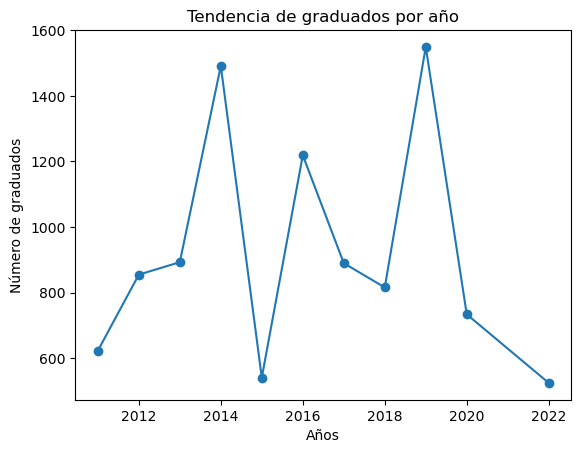

In [167]:
plt.plot(x,y, marker='o')
plt.xlabel('Años')
plt.ylabel('Número de graduados')
plt.title('Tendencia de graduados por año')
plt.show()

In [168]:
graduates_per_genre = df.groupby('SEXO').size().reset_index(name='CANTIDAD') 
graduates_per_genre

labels = graduates_per_genre['SEXO']

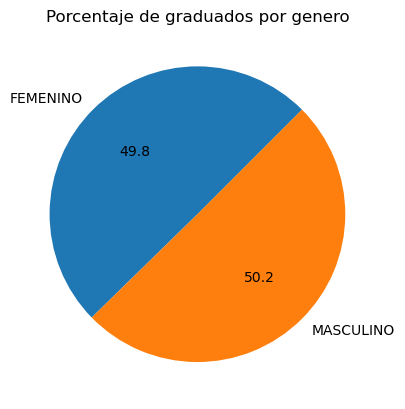

In [169]:
fig, ax = plt.subplots()
ax.pie(graduates_per_genre['CANTIDAD'], autopct='%1.1f', labels=labels, startangle=45)
plt.title('Porcentaje de graduados por genero')
plt.show()

In [170]:
graduates_per_program = df.groupby('PROGRAMA ACADEMICO').size().reset_index(name='NÚMERO DE GRADUADOS')

x = graduates_per_program['PROGRAMA ACADEMICO']
y = graduates_per_program['NÚMERO DE GRADUADOS']

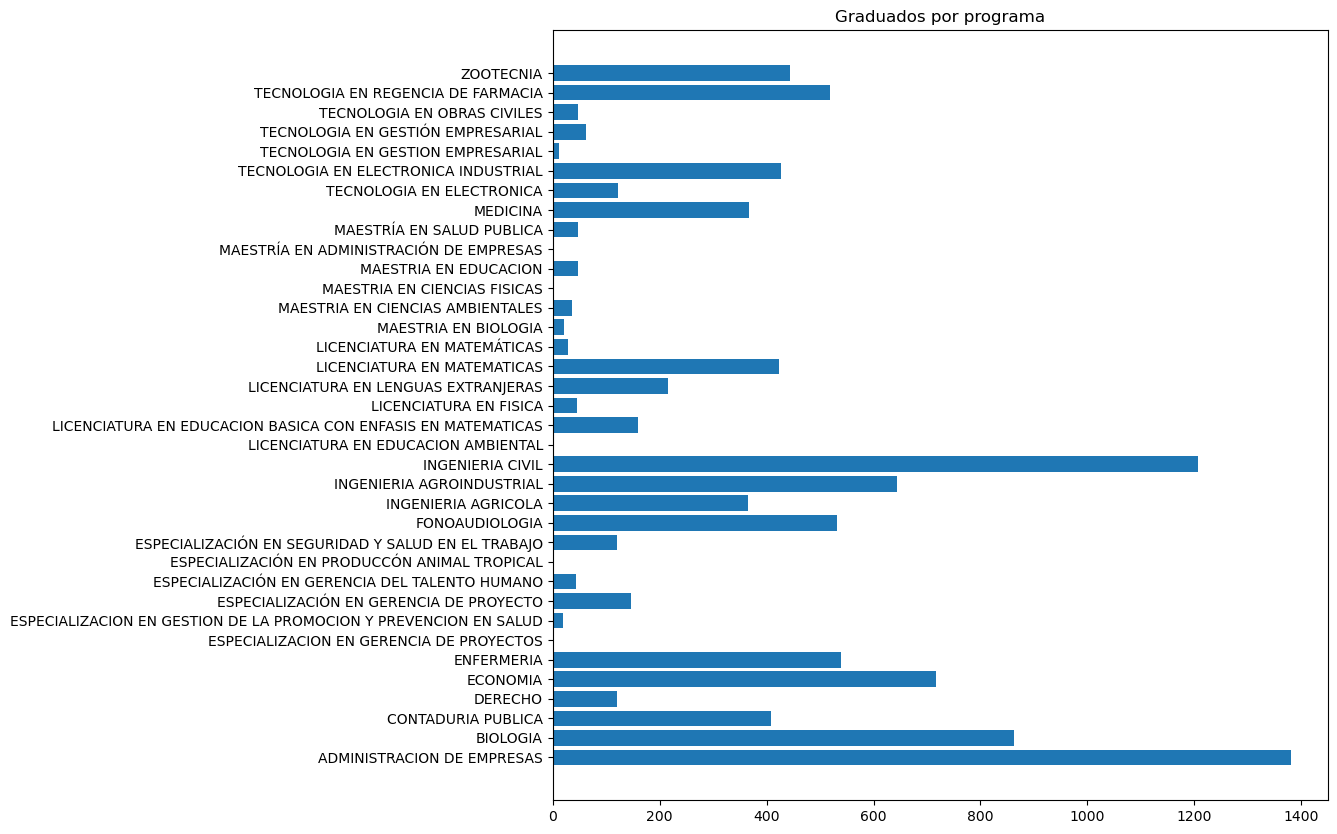

In [171]:
plt.figure(figsize=(10,10))
plt.barh(x,y)
plt.title('Graduados por programa')
plt.show()